<a href="https://colab.research.google.com/github/cheloberrios/Proydatadojo/blob/main/Prediccion_de_ventas_pipeline_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###. presentación #####  https://docs.google.com/presentation/d/10Vyz0PdX6Bp8Bck_L6e--kwwHit8gZd1dsUEoyFvzmo/edit#slide=id.p.  ####

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import precision_score

In [ ]:
df = pd.read_csv("sales_predictions.csv")

In [ ]:
df.shape
#1) ¿Cuántas filas y columnas?



(8523, 12)

In [ ]:
#2) ¿Cuáles son los tipos de datos en cada variable?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
duplicados = df.duplicated()
#filas_duplicadas = df.loc[duplicados]
#filas_duplicadas
duplicados



0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
conteo_valores = duplicados[[0]].value_counts()
conteo_valores

False    1
dtype: int64

In [ ]:
#4) Identifiquen los valores faltantes.

print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
df_reemplazado = df.replace(np.nan, 0)
print(df_reemplazado.isnull().sum())


NameError: ignored

In [ ]:
pd.options.display.max_rows = None


In [ ]:
print(df['Item_Type'].value_counts())



Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [ ]:
#(mínimo, máximo y media)

print("Mínimos de cada columna:")
print(df.min())

# encontrar el máximo de cada columna
print("Máximos de cada columna:")
print(df.max())

# encontrar la media de cada columna
print("Medias de cada columna:")
print(df.mean())

Mínimos de cada columna:
Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                        LF
Item_Visibility                        0.0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object
Máximos de cada columna:
Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket

<ipython-input-12-f4742541ef38>:4: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.min())
<ipython-input-12-f4742541ef38>:8: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.max())
<ipython-input-12-f4742541ef38>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


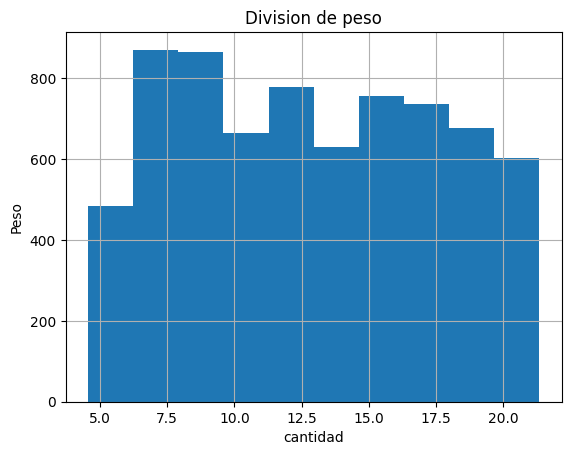

In [ ]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.
import matplotlib.pyplot as plt

df['Item_Weight'].hist(bins=10)
plt.title('Division de peso')
plt.xlabel('cantidad')
plt.ylabel('Peso')
plt.show()

Text(0, 0.5, 'Promedio')

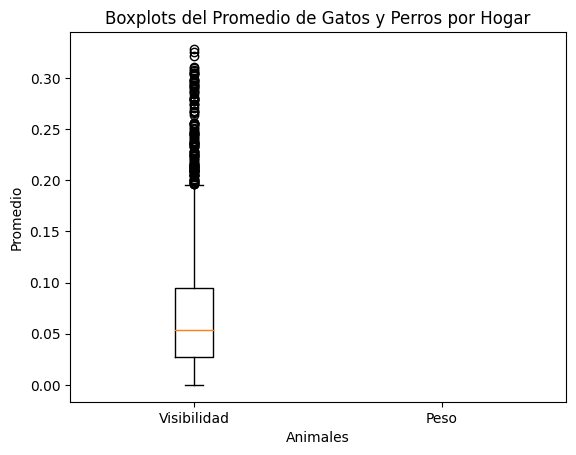

In [ ]:
#Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
Visibilidad = df['Item_Visibility']
peso = df['Item_Weight']
fig, ax = plt.subplots()
ax.boxplot([Visibilidad, peso], positions=[1,2], labels=['Visibilidad','Peso'])

plt.title('Boxplots del Promedio de Gatos y Perros por Hogar')
plt.xlabel('Animales')
plt.ylabel('Promedio')


<ipython-input-15-b328353a5771>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

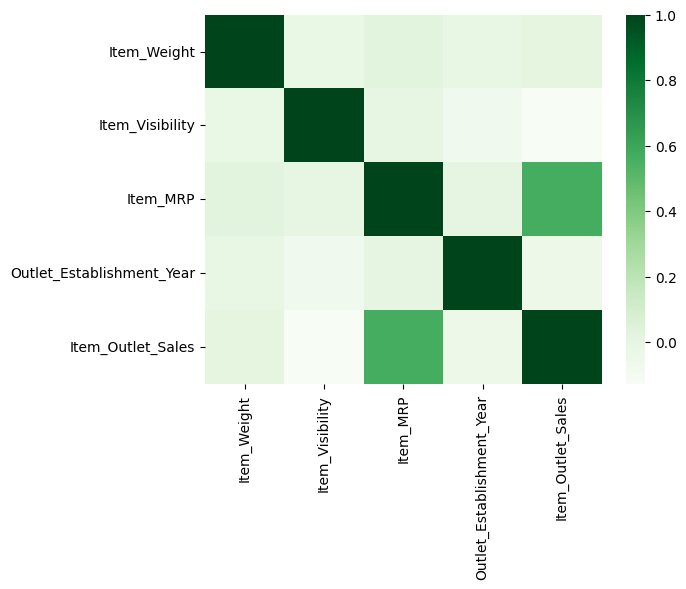

In [ ]:
#Mapa de calor de la correlación entre las características.
import seaborn as sns

import pandas as pd
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).


Item_Outlet_Sales

Item_Type	

NameError: ignored

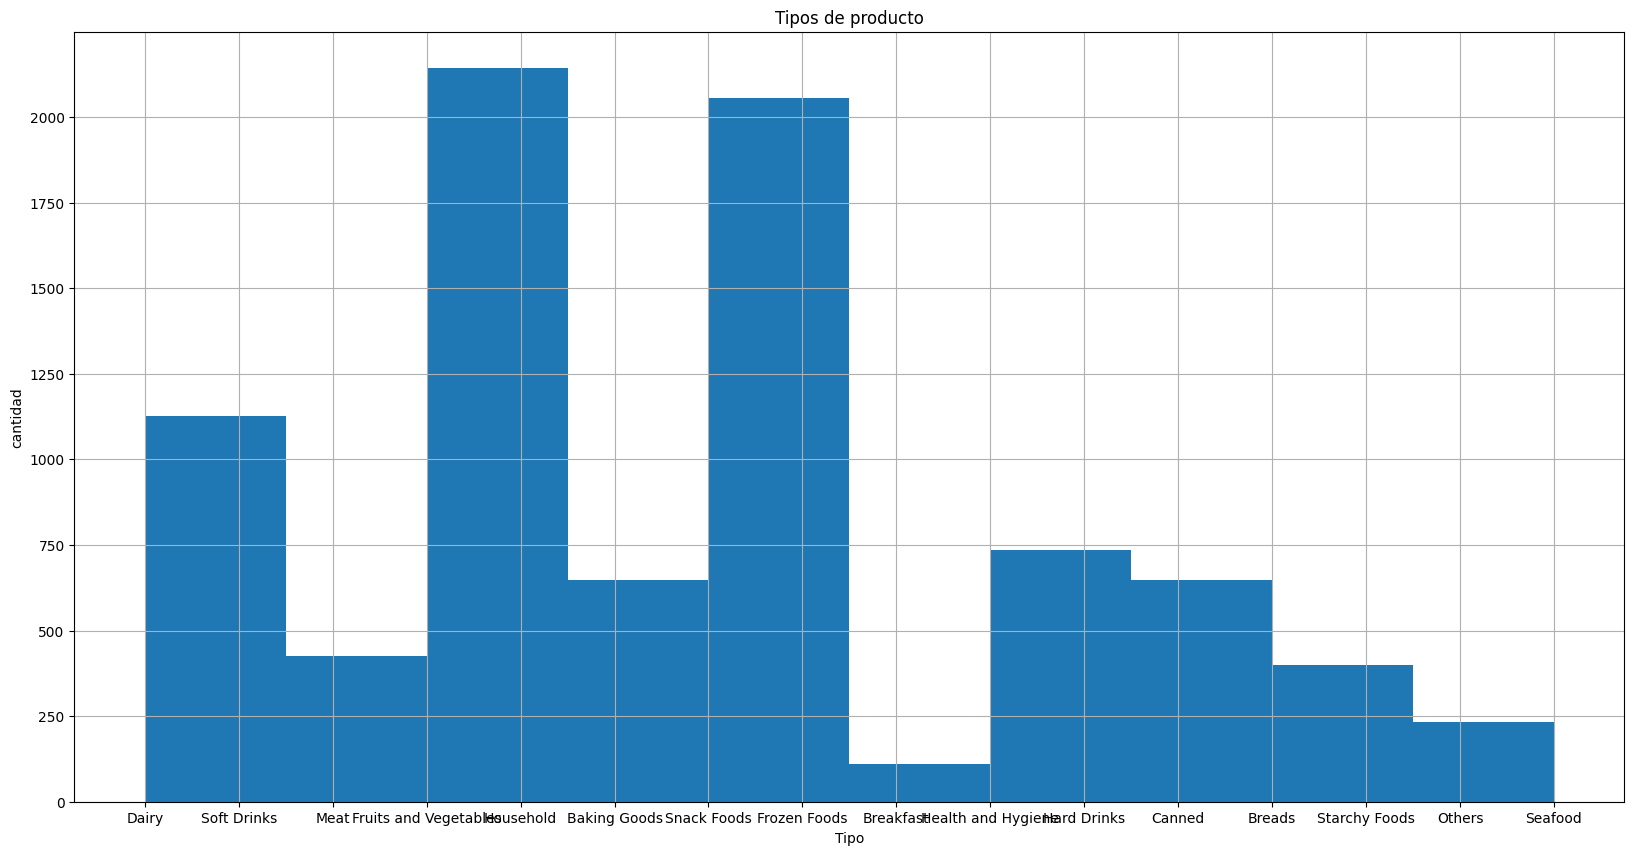

In [ ]:
df['Item_Type'].hist(bins=10, figsize=(20, 10))

# Agregar títulos y etiquetas
plt.title('Tipos de producto')
plt.xlabel('Tipo')
plt.ylabel('cantidad')

# Mostrar plot
plt.show()

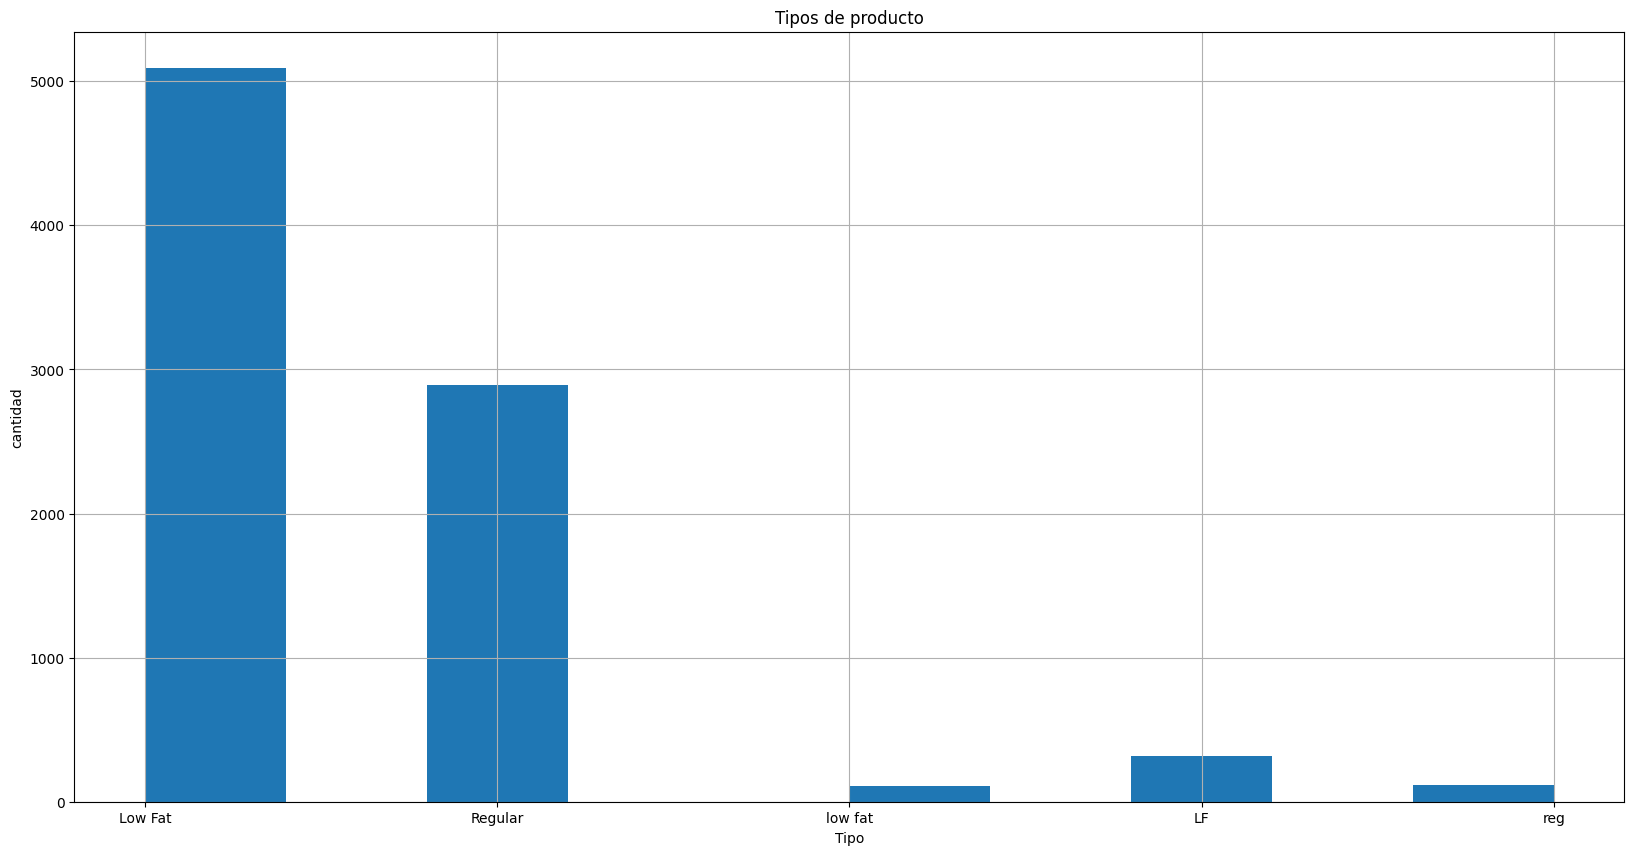

In [ ]:
df['Item_Fat_Content'].hist(bins=10, figsize=(20, 10))

# Agregar títulos y etiquetas
plt.title('Tipos de producto')
plt.xlabel('Tipo')
plt.ylabel('cantidad')

# Mostrar plot
plt.show()

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:

diccionario = {'Low Fat': 1, 'Regular': 2, 'LF': 1, 'reg': 2, 'low fat': 1}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(diccionario)
df['Item_Fat_Content'].value_counts()


1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
	df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
	df['Outlet_Size'].value_counts()

In [ ]:
diccionario = {'Small': 1, 'Medium': 2, "High": 3}
df['Outlet_Size'] = df['Outlet_Size'].replace(diccionario)
df['Outlet_Size'].value_counts()

2.0    2793
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

In [ ]:
X = df.drop("Item_Outlet_Sales", axis=1)

In [ ]:
y = df["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instancien los selectores a nuestros tipos de datos numéricos 
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


#cat_selector = df.select_dtypes(include="object").columns
#num_selector = df.select_dtypes(exclude="object").columns

In [ ]:
mean = SimpleImputer(strategy='mean')
most_frequent = SimpleImputer(strategy='most_frequent')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

scaler = StandardScaler()

In [ ]:
categorical_transformer = Pipeline([
    ('most_frequent', most_frequent),
    ("ohe" , ohe)
])

numerical_transformer = Pipeline([
    ('mean', mean),
])

In [ ]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[        ('num', numerical_transformer, num_selector),        ('cat', categorical_transformer, cat_selector)    ])

pipeline = Pipeline([    ('preprocessor', preprocessor),    ('scaler', StandardScaler())])

In [ ]:
cat_selector(X_train)
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
# Entrenamos el pipeline con los datos de entrenamiento
pipeline.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('mean',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc43d2fa020>),
                                                 ('cat',
                                                  Pipeline(steps=[('most_frequent',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc43d2f8310>)])),
                ('scaler', StandardScaler())])

In [ ]:
X_train_p = pipeline.fit_transform(X_train)
X_test_p = pipeline.transform(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

Creen un modelo de regresión lineal.
Evalúen el rendimiento del modelo basándose en r^2.
Evalúen el rendimiento del modelo basándose en RECM.



In [ ]:
#regresion lineal


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
reg = LinearRegression()


In [ ]:
reg.fit(X_train_p ,y_train)


LinearRegression()

In [ ]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = reg.predict(X_test_p)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 5.074355642498925e+30
RMSE: 2252633046569930.0
MAE: 179452529802727.7
R²: -1.8392161707619426e+24


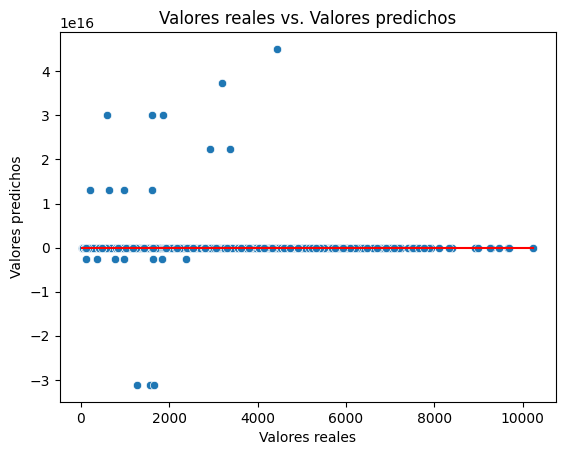

In [ ]:
f = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Crear un scatter plot con los valores reales vs. los valores predichos
sns.scatterplot(x='y_test', y='y_pred', data=f)

# Agregar una línea diagonal para comparar visualmente los valores reales y predichos
sns.lineplot(x=[f['y_test'].min(), f['y_test'].max()], y=[f['y_test'].min(), f['y_test'].max()], color='red')

# Agregar etiquetas y título al gráfico
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()

ValueError: ignored

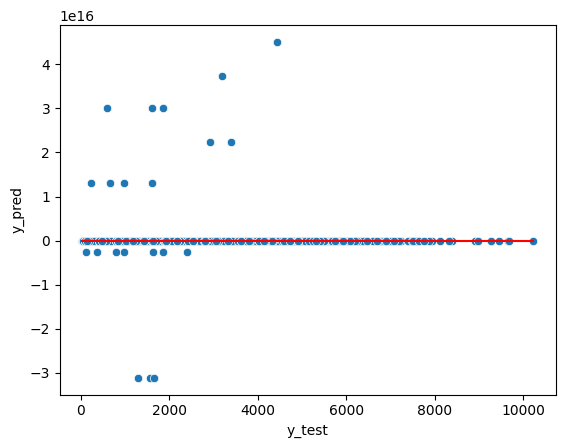

In [ ]:

# Crear un scatter plot con los valores reales vs. los valores predichos
sns.scatterplot(x='y_test', y='y_pred', data=f)

# Agregar una línea diagonal para comparar visualmente los valores reales y predichos
sns.lineplot(x=[f['y_test'].min(), f['y_test'].max()], y=[f['y_test'].min(), f['y_test'].max()], color='red')

# Crear un gráfico de líneas con los valores predichos vs. los valores de x_test
sns.lineplot(x=X_test, y=y_pred, color='blue')

# Agregar etiquetas y título al gráfico
plt.xlabel('Valores de x_test')
plt.ylabel('Valores de y')
plt.title('Comparación de valores reales vs. predichos')
plt.show()

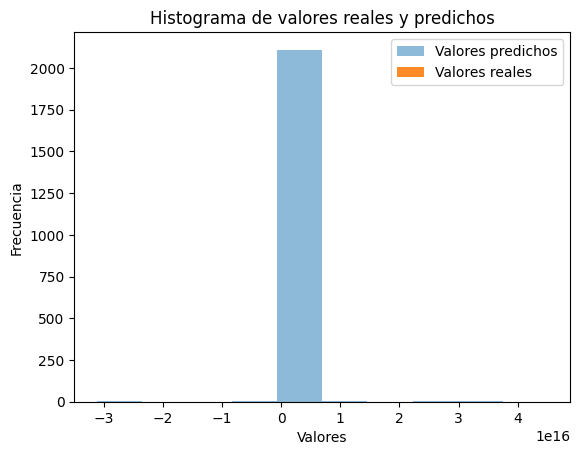

In [ ]:


# Crear un histograma de los valores predichos
plt.hist(y_pred, alpha=0.5, label='Valores predichos')

# Crear un histograma de los valores reales (test)
plt.hist(y_test, alpha=0.9, label='Valores reales')

# Agregar leyendas y títulos al gráfico
plt.legend(loc='upper right')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores reales y predichos')

# Mostrar el gráfico
plt.show()

# La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

Creen un modelo simple de árbol de regresión.
Comparen el rendimiento del modelo basándose en r^2.
Comparen el rendimiento del modelo basándose en RECM.  

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Crear un modelo de árbol de regresión
tree_reg = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_reg.fit(X_train_p, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = tree_reg.predict(X_test_p)



In [ ]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 2136543.330690426
RMSE: 1461.6919411047
MAE: 991.6452069450961
R²: 0.22560314645107293


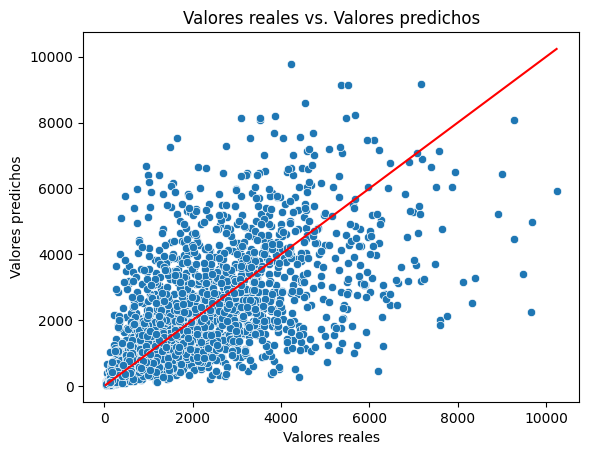

In [ ]:
f = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Crear un scatter plot con los valores reales vs. los valores predichos
sns.scatterplot(x='y_test', y='y_pred', data=f)

# Agregar una línea diagonal para comparar visualmente los valores reales y predichos
sns.lineplot(x=[f['y_test'].min(), f['y_test'].max()], y=[f['y_test'].min(), f['y_test'].max()], color='red')

# Agregar etiquetas y título al gráfico
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()

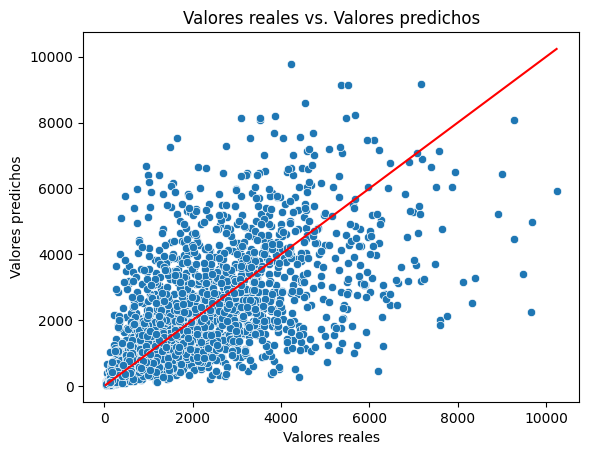

In [ ]:
# Crear un gráfico de dispersión con Seaborn
sns.scatterplot(x='y_test', y='y_pred', data=f)
# Agregar una línea diagonal para comparar visualmente los valores reales y predichos
sns.lineplot(x=[f['y_test'].min(), f['y_test'].max()], y=[f['y_test'].min(), f['y_test'].max()], color='red')
# Agregar etiquetas y título al gráfico
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()


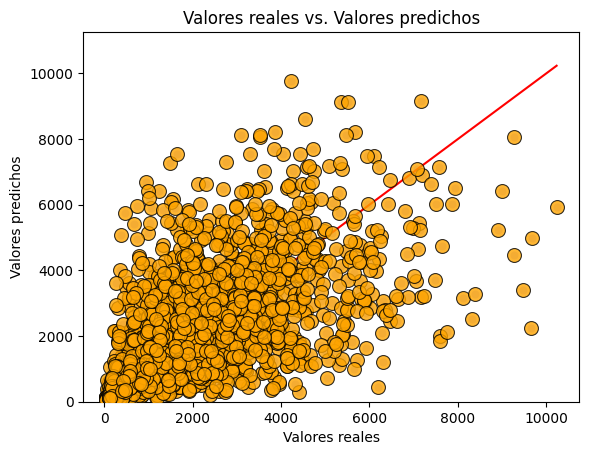

In [ ]:
 #Crear un scatter plot con los valores reales vs. los valores predichos
sns.scatterplot(x='y_test', y='y_pred', data=f, alpha=0.2, color='blue')

# Crear un scatter plot con los valores predichos por encima de los valores reales
sns.scatterplot(x='y_test', y='y_pred', data=f, alpha=0.8, color='orange', edgecolor='black', zorder=10, marker='o', s=100)

# Agregar una línea diagonal para comparar visualmente los valores reales y predichos
sns.lineplot(x=[f['y_test'].min(), f['y_test'].max()], y=[f['y_test'].min(), f['y_test'].max()], color='red')

# Agregar etiquetas y título al gráfico
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')

# Ajustar la escala del eje y para que los puntos predichos estén visualmente arriba
y_max = max(f['y_test'].max(), f['y_pred'].max())
plt.ylim(0, y_max * 1.1)

# Mostrar el gráfico
plt.show()

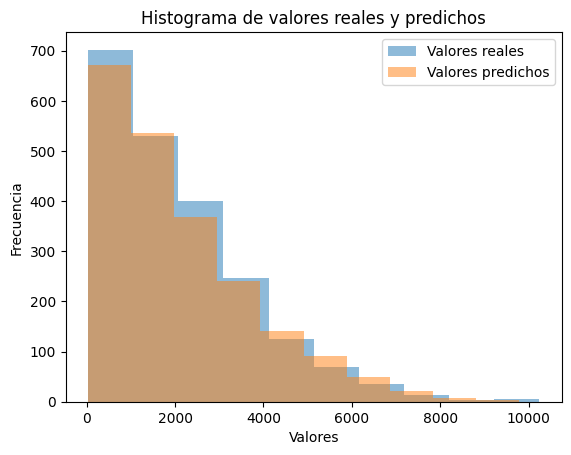

In [ ]:
# Crear un histograma de los valores reales (test)
plt.hist(y_test, alpha=0.5, label='Valores reales')

# Crear un histograma de los valores predichos
plt.hist(y_pred, alpha=0.5, label='Valores predichos')

# Agregar leyendas y títulos al gráfico
plt.legend(loc='upper right')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores reales y predichos')

# Mostrar el gráfico
plt.show()